# ***EDA To Prediction (DieTanic)***

https://www.kaggle.com/ash316/eda-to-prediction-dietanic



In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나이다. 1912년 4월 15일, 그녀의 처녀 항해 도중, 타이타닉호는 빙산과 충돌하여 침몰하여 승객과 승무원 2224명 중 1502명이 사망했다. 그래서 디에타닉이라는 이름이에요. 이것은 이 세상 누구도 잊을 수 없는 엄청난 재앙입니다.

타이타닉호를 만드는 데 750만 달러가 들었고 충돌로 인해 바다 밑으로 가라앉았다. 타이타닉 데이터셋은 초보자들이 데이터 과학에 대한 여정을 시작하고 Kaggle에서 열리는 대회에 참가하기 위한 매우 좋은 데이터셋입니다.

이 노트북의 목적은 모든 예측 모델링 문제에서 워크플로우가 어떤지를 파악하는 것입니다. 기능 확인 방법, 새 기능 추가 방법 및 일부 기계 학습 개념. 저는 노트북의 모든 부분을 초보자도 이해할 수 있도록 최대한 기초적인 노트북을 유지하려고 노력했습니다.

만약 당신이 노트북을 좋아하고 그것이 당신에게 도움이 되었다고 생각한다면..투표해 주세요. 동기부여가 될 거예요.

# ***데이터 분석 순서 오버뷰***
Part 1: 탐색적 데이터 분석(EDA):

1) 특징 분석

2) 당시 상황 및 상식을 근거로 한 데이터간 관계 찾기

Part 2: 피쳐 엔지니어링 및 데이터 전처리:

1) 몇 가지 피쳐 추가.

2) 중복된 피쳐 제거.

3) 데이터를 모델링에 적합한 형태로 변환

Part 3: 모델링

1) 기본 알고리즘으로 한번 실행.

2) 교차 검증해보기.

3) 앙상블 해보기.

4) 중요한 피쳐 추출.

결론적으로 데이터셋을 아래와 같이 전처리(변형)를 해야 하며 전처리하는 과정을 설명하는 것이 금일 발표의 핵심입니다.

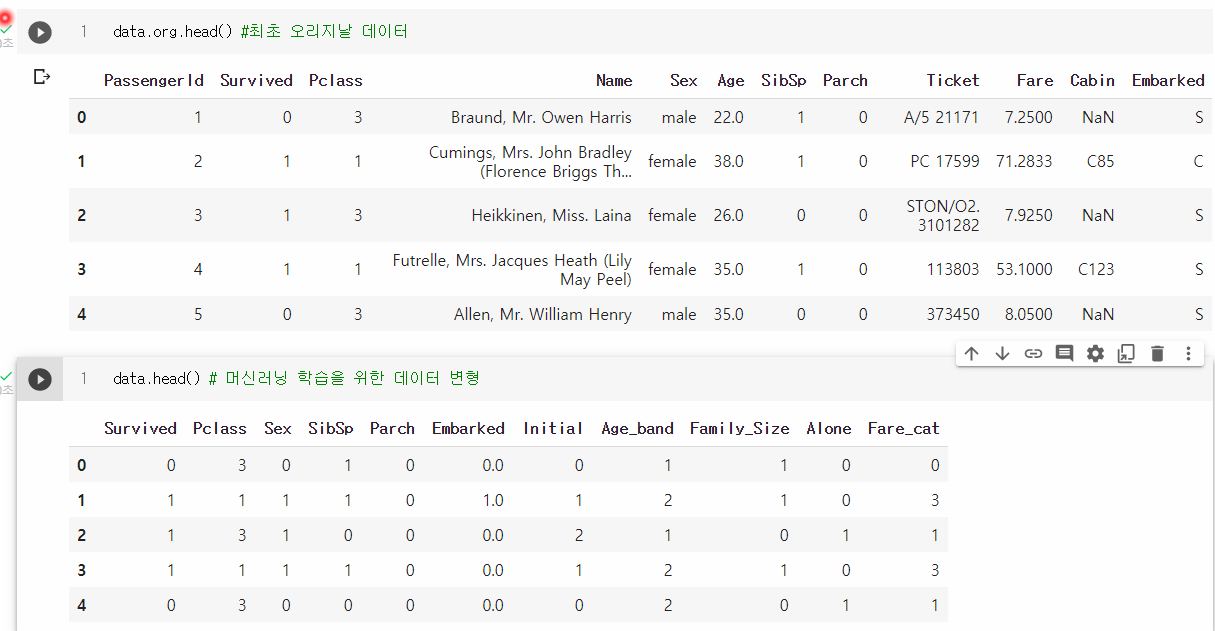

# 데이터 피쳐 확인
   * 'PassengerId'는 행의 고유 ID이며 대상에 영향을 미치지 않습니다.
   * 'Survived'은 예측하려는 타겟 변수입니다(0 또는 1).
1 = 생존, 0 = 생존 안 함
   * 'P 클래스'(Passenger Class)는 승객의 사회-경제적 지위이며 3개의 고유한 값(**1**, **2** 또는 **3**)을 갖는 범주형 서수 특성입니다. 
   1 = 상류층, 2 = 중산층, 3 = 하급
   * Name, Sex, Age 는 별도 설명 하지 않겠음
   * 'SibSp'는 승객의 형제자매와 배우자의 총수입니다.
   * 'Parch'는 승객 부모와 자녀의 총계입니다.
   * 'Ticket'은 승객의 티켓 번호입니다.
   * 'Fare'은 승객 요금입니다.
   * 'Cabin'은 승객의 물건을 실은 캐비넷 번호입니다.
   * 'Embarked'은 승선항(탑승항구)이며 3개의 고유 값(**C**, **Q** 또는 **S**)을 갖는 범주형 피쳐입니다.
   C = 셸부르,
   Q = 퀸스타운,
   S = 사우스햄턴

In [101]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1.Part1: Exploratory Data Analysis(EDA)

In [102]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [103]:
%cd /content
!rm -rf kaggle-titanic #현재 이미 설치되어 있다면 삭제하고 다시 시작
!git clone https://github.com/minsuk-heo/kaggle-titanic
%cd /content/kaggle-titanic
!ls -al 

/content
Cloning into 'kaggle-titanic'...
remote: Enumerating objects: 34, done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (34/34), done.
/content/kaggle-titanic
total 580
drwxr-xr-x 5 root root   4096 Aug 22 12:35 .
drwxr-xr-x 1 root root   4096 Aug 22 12:35 ..
drwxr-xr-x 8 root root   4096 Aug 22 12:35 .git
drwxr-xr-x 2 root root   4096 Aug 22 12:35 images
drwxr-xr-x 2 root root   4096 Aug 22 12:35 input
-rw-r--r-- 1 root root 572182 Aug 22 12:35 titanic-solution.ipynb


In [98]:
data=pd.read_csv('input/train.csv')
data.org=pd.read_csv('input/train.csv')  # 데이터 변형되는 것을 비교 하기 위해 백업용

In [104]:
data.shape

(891, 12)

In [100]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


NULL 값 있는지 확인

In [47]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin , Embarked 값에 일부 null 값이 있음. 수정해야 함



## 1-1.얼마나 많이 생존하고 돌아가셨나?

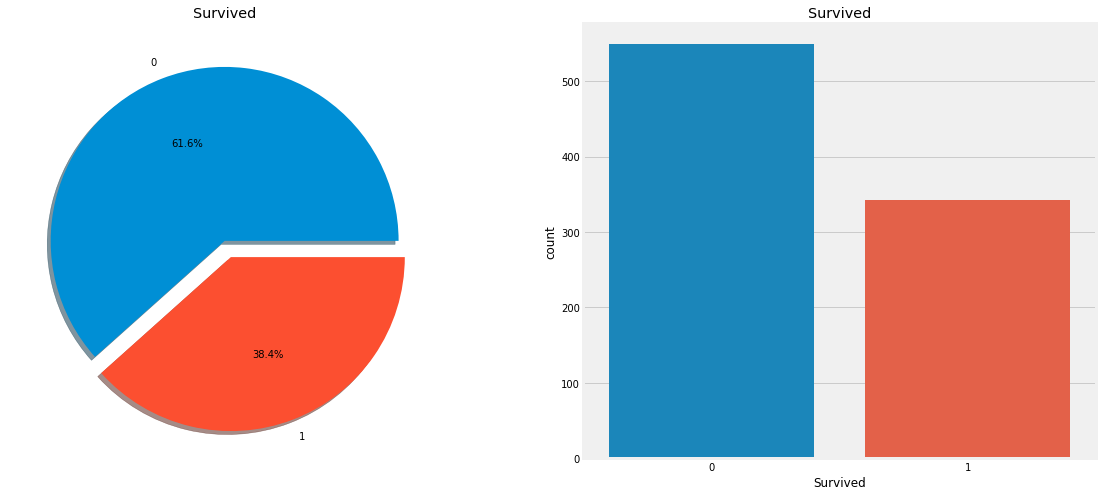

In [48]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 승객이 많지 않은 것이 분명하다.

훈련 세트 승객 891명 중 350명만이 살아남았다. 즉, 전체 훈련 세트의 38.4%만이 추락에서 살아남았다. 우리는 데이터에서 더 나은 통찰력을 얻고 승객의 어떤 부류가 살아남았는지 그리고 누가 살아남지 못했는지 알아보기 위해 더 많은 것을 파헤쳐야 합니다.

데이터셋의 여러 기능을 사용하여 생존율을 확인할 것입니다. 몇 가지 확인해야 할 Features는 **Sex, Embarked, Age, PClass** 등이 있습니다.

먼저 여러 가지 Feature 타입에 대해 알아보겠습니다.

## 1-2.데이터 피쳐 및 타입 확인



### Categorical(범주형) Features:
범주형 변수는 둘 이상의 값이 있는 변수이며, 각 값은 범주로 분류할 수 있습니다.예를 들어 성별은 두 가지 범주(남성 및 여성)를 갖는 범주형 변수입니다.해당 컬럼 안에 있는 값들의 전체 개수가 범주의 최대 개수가 됩니다.

**범주형 Features: Sex, Embarked.**

### Ordinal(순서형) Features:
순서형 변수는 범주형 값과 비슷하지만 값 간에 상대적인 순서나 정렬을 할 수 있다는 점이 다릅니다. 예: 높이(높이), 중간(중간), 짧은(짧은) 값을 갖는 기능이 있는 경우 높이는 순서 변수입니다. 여기서는 변수에서 상대적인 유형을 가질 수 있습니다.

**순서형 Features: PClass**



### Continous(연속형) Feature:
피쳐 열의 두 점 사이 또는 **최소값 또는 최대값** 사이에 값을 가져올 수 있는 피쳐는 연속형이라고 합니다.

**연속형 Features: Age**

## 1-3.데이터 셋의 피쳐들 분석하기(Analysing The Features)

## 1-4.Sex(성별)과 생존율 관계 분석

In [49]:
data.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [50]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

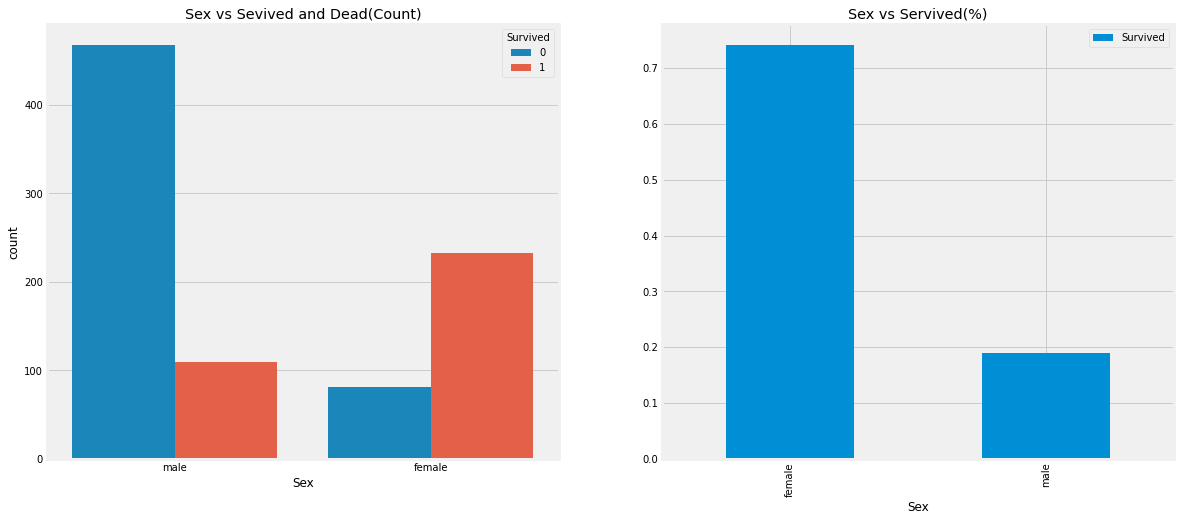

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Sex',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Sex vs Sevived and Dead(Count)')
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Sex vs Servived(%)')

plt.show()

배에 타고 있는 남자들의 수가 여자들의 수보다 훨씬 더 많다. 하지만 구조된 여성의 수는 남성 구조된 사람의 거의 두 배이다. 배에 탑승한 **여성의 생존율은 75%인 반면 남성은 18~19%**이다.

이것은 모델링에 매우 중요한 기능인 것 같습니다.

## 1-5.Pclass 와 생존율 관계 분석

In [52]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


사람들은 **돈으로 모든 걸 살 수는 없다고 말한다.** 하지만 P 클래스 1의 Passenegers는 구조하는 동안 매우 높은 우선순위를 부여받았음을 알 수 있습니다. **P클래스 3의 탑승자 수는 훨씬 많았음에도 불구하고 생존자 수는 25%** 정도로 매우 적다.

**P클래스1 생존율은 약 63%, P클래스2 생존율은 약 48%**입니다. 그래서 돈과 지위가 중요하다. 정말 물질만능주의적인 세상이네요.

좀 더 자세히 살펴보고 다른 흥미로운 관측치를 확인합니다. Sex와 Pclass 를 동시에 엮어서 생존율을 확인해보자.

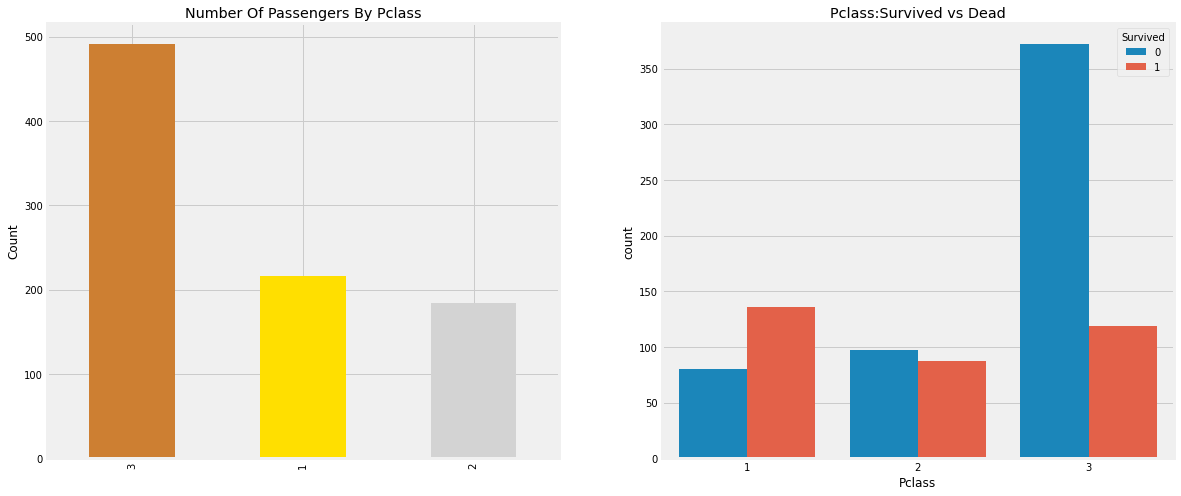

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')  # Pclass 기준별 따른 승객수 비교
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')  # Pclass 별 생존과 사망건수 비교
plt.show()

## 1-6.성별및 Pclass와 생존율 관계 분석

In [16]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

팩터 플랏으로 Pclass와 성별에 따른 생존율 분석

크로스 탭과 팩터플랏 그림을 보면 P클래스1 여성 94명 중 3명만이 사망했기 때문에 Pclass1 여성의 생존율은 약 95-96%라는 것을 쉽게 추론할 수 있습니다.

Pclass 3의 여성의 생존율은 50%이지만 **구조 과정에서 여성이 최우선 순위로 주어진 것은 분명하다.** 심지어 Pclass 1인 남자들은 생존율이 매우 낮습니다.

Pclass도 중요한 피쳐인것으로 보입니다.

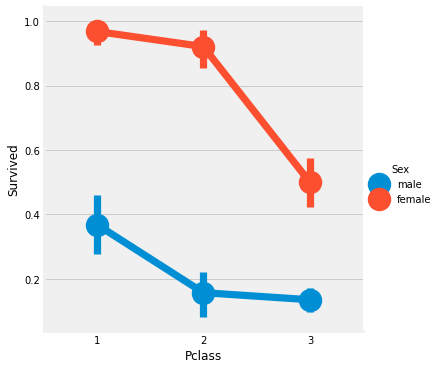

In [54]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

## 1-7.Age(나이)와 생존율 관계 분석(Pclass 및 나이, 나이 및 성별)


바이올린 플랏

In [56]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Pclass와 Age에 따른 생존율 분석 / 성별과 Age에 따른 생존율 분석

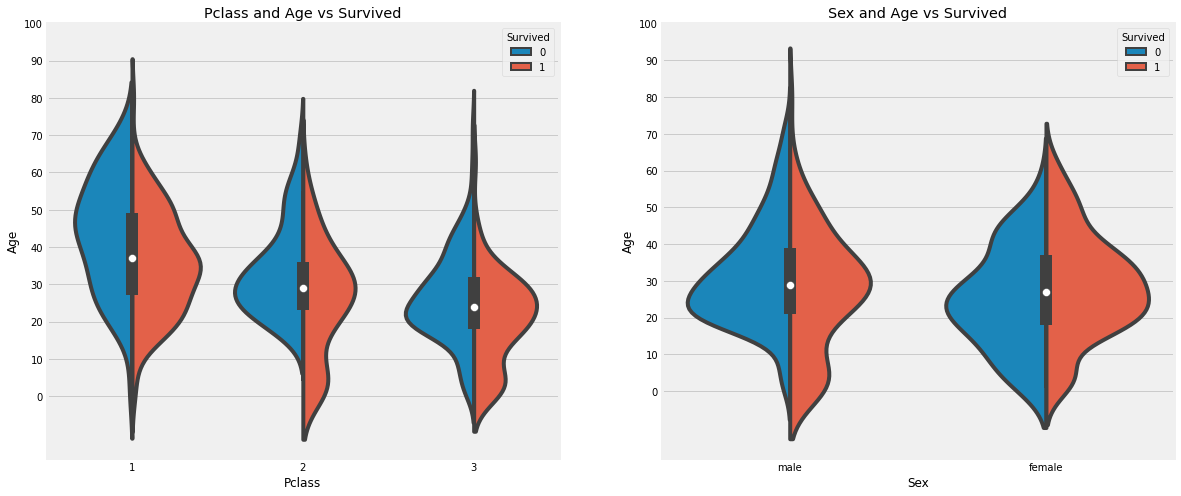

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
# sns.violinplot("Pclass","Sex", hue="Survived", data=data,split=True,ax=ax[1])
# ax[1].set_title('Pclass and Sex vs Survived')
# ax[1].set_yticks(range(0,110,10))
plt.show()

### 중간 분석 결과 1

1) P클래스에 따라 어린이 수의 차이가 있으며, 10세 미만 승객(즉, 어린이)의 생존율은 P클래스에 관계없이 양호한 것으로 보인다.

2)P클래스1의 20~50세의 승객 생존 확률은 높으며, 여성에게는 더욱 좋다.

3)남성은 나이가 들수록 생존확률이 감소한다.

## 1-8.Age 피쳐의  null값 처리하기

앞에서 살펴본 바와 같이 Age 항목은 177개의 Null 값을 가집니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 사용 기간을 할당할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많이 있었다는 것이다. 평균 연령이 29세인 사람에게 4세를 배정할 수는 없습니다. 승객이 몇 살에 거짓말을 하는지 알 수 있는 방법이 있나요?

이름 이니셜및 칭호를 보고 확인할 수 있습니다. 이름 피쳐를 살펴보면, 그 이름들이 Mr/Mrs와 같은 칭호를 가지고 있음을 알 수 있습니다. 따라서 Mr와 Mrs의 평균값을 각 그룹에 할당할 수 있습니다.


In [60]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [61]:
print('Average Age on the ship:',data['Age'].mean(),'Years')

Average Age on the ship: 29.69911764705882 Years


In [59]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

정규식 **'[A-Za-z]+.'**을 사용합니다.  즉, A-Z 또는 a-z 사이에 있는 문자열과 .(점) 뒤에 오는 문자열을 찾는 것입니다. **Name피쳐에서 Initial피쳐를** 추출했습니다.

In [62]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


칭호에도 오타가 많이 있습니다. 
그러한 값들을 Miss와 Mr 로 교체하겠습니다.
   * Mr <- Dr, Major, Capt,Sir,Don
   * Miss <- 나머지

In [63]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [64]:
data.org.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


이니셜 별로 평균 나이를 구함.

In [66]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

이름 이니셜의 평균 나이를 구하여 나이 항목의 Null값 처리하기

In [67]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [68]:
data.Age.isnull().any() #So no null values left finally 

False

In [69]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

Age 피쳐 null값 처리후 분석하기

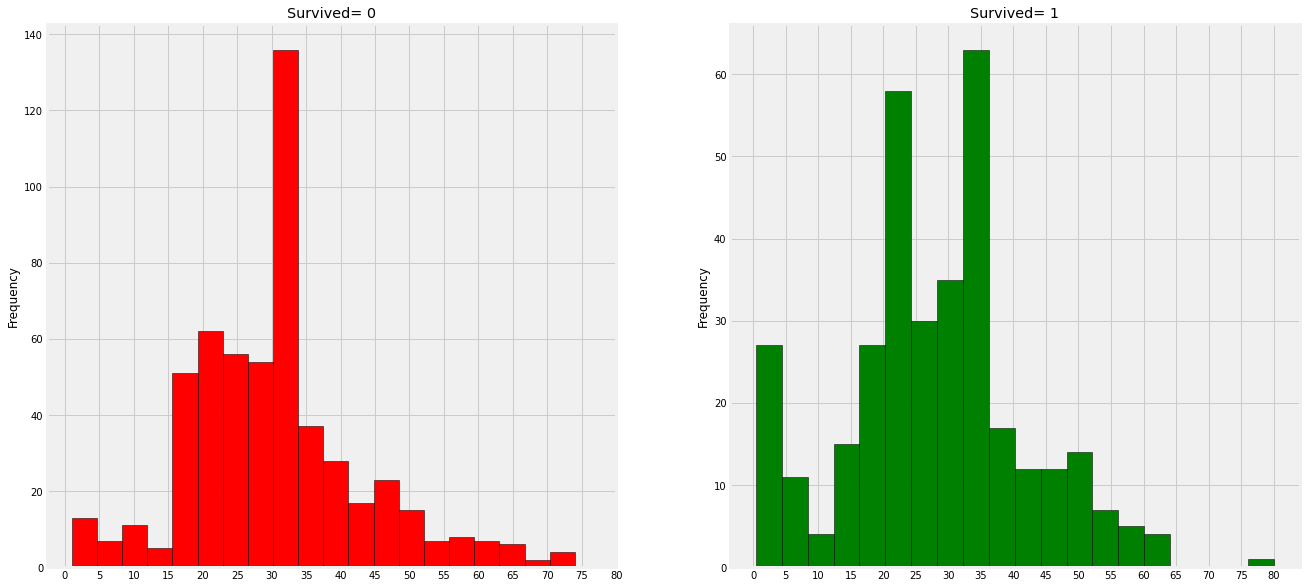

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 중간 분석결과 2

1) 유아(5세이하) 및 15세이하는 대부분으로 생존되었다(여성 및 아동 우선 정책).

2) 최고령 승객도 구조되었습니다(80세).

3) 최대 사망자 그룹은 30~40세였다.

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

## 1-9.Pclass 및 Initial 피쳐와 생존율 관계




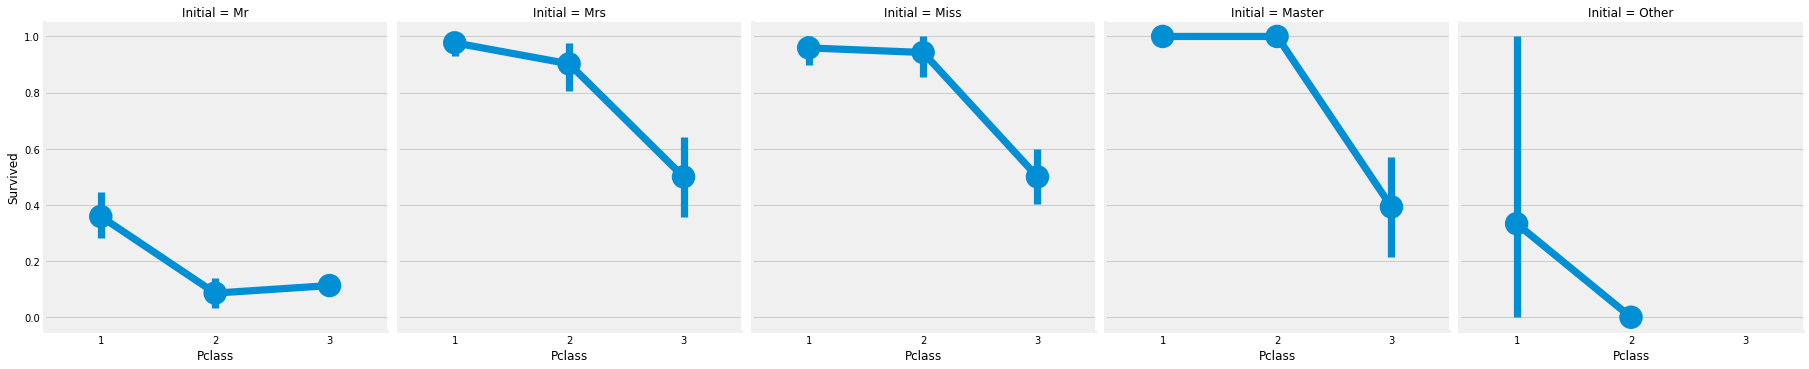

In [71]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

여성과 아동 우선 정책은 계급에 상관없이 모든 Pclass에서  적용 된 것으로 추측된다.

## 1-10.탑승 항구와 생존율 관계 분석(카테고리형 항목)

* 'Embarked'은 승선항이며 **3** 고유 값(**C*, **Q** 또는 **S**)을 갖는 범주형 기능입니다.
- **C = 셸부르**
- **Q = 퀸스타운**
- **S = 사우스햄턴**

탑승항구별 Pclass와 성별에 따른 생존율 확인(4차원 비교)

In [72]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 탑승항구별 생존율 비교(Chances for Survival by Port Of Embarkation)

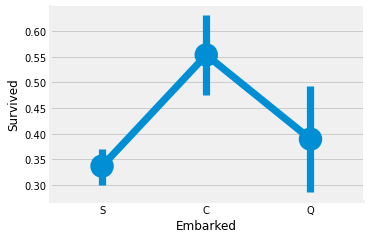

In [31]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C항구 탑승객의 생존율은 약 55% , Q항구 탑승객의 생존율은 약 39%, S항구 탑승객의 생존율은 약 34%



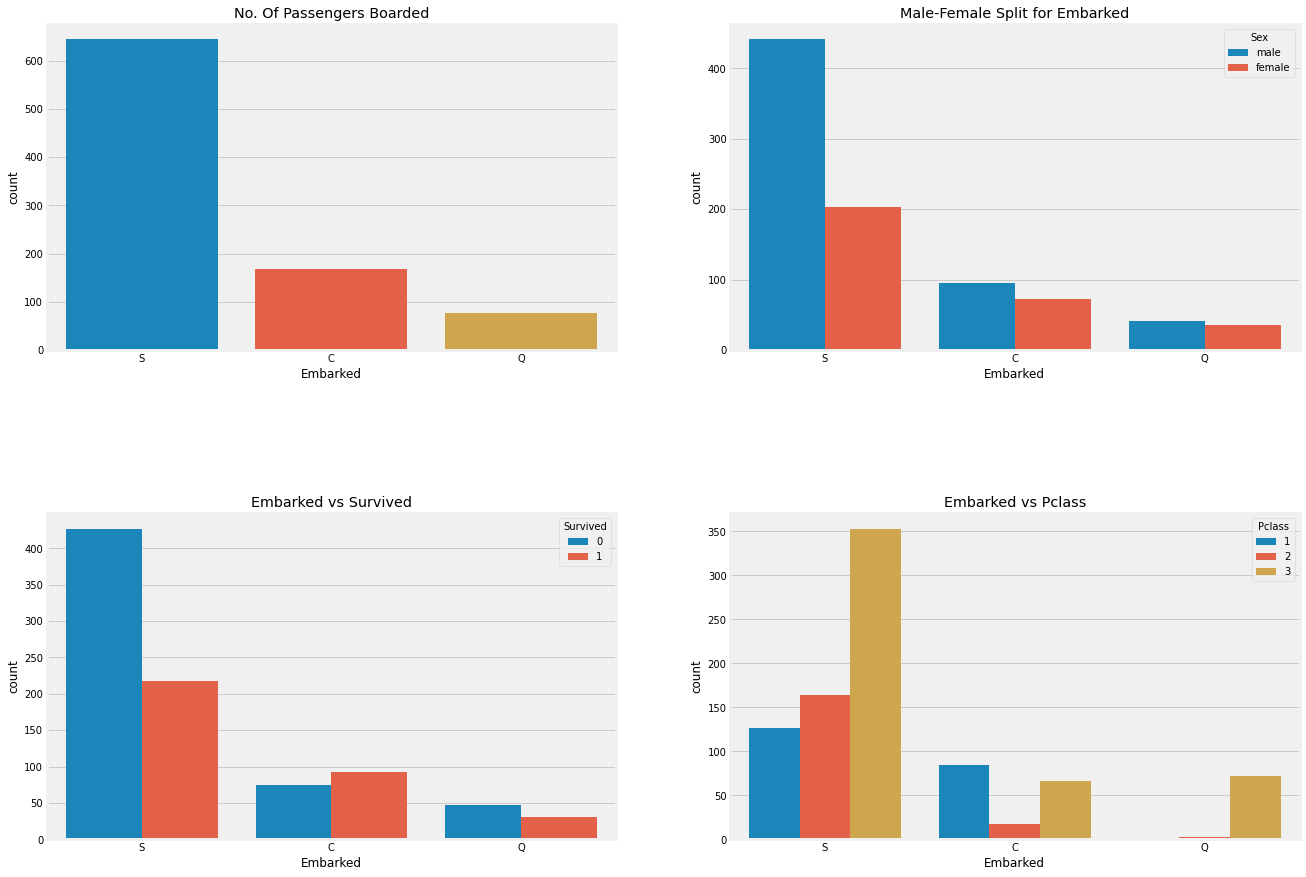

In [74]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### 중간 분석 결과 3
1) S(사우스햄턴)에서 탑승한 최대 승객 중 절반이 P클래스3 출신입니다. Pclass 3에서 81% 안팎의 승객들이 살아남지 못했습니다.
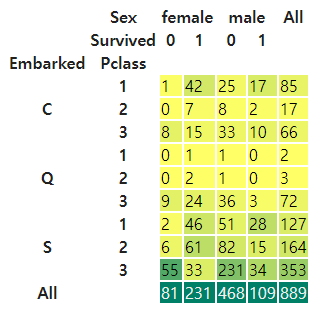

2) C(셸부르)에서 온 승객들 중 상당수가 살아남은 것으로 보아 운이 좋은 것으로 보인다. 그 이유는 P클래스1과 P클래스2 승객 모두를 구조한 것일 수 있습니다.

3) Q(퀸스파크)의 탑승자 중 95%가 P클래스3 출신이었습니다.

4) S에서 탑승한 P클래스1 승객보다 C에서 탑승한 Pclass1 승객의 생존 가능성이 더 높았습니다.

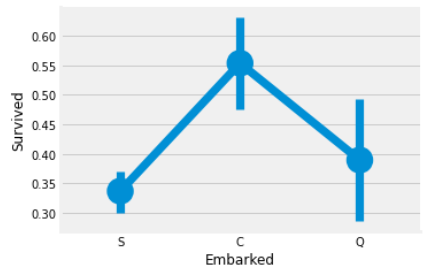

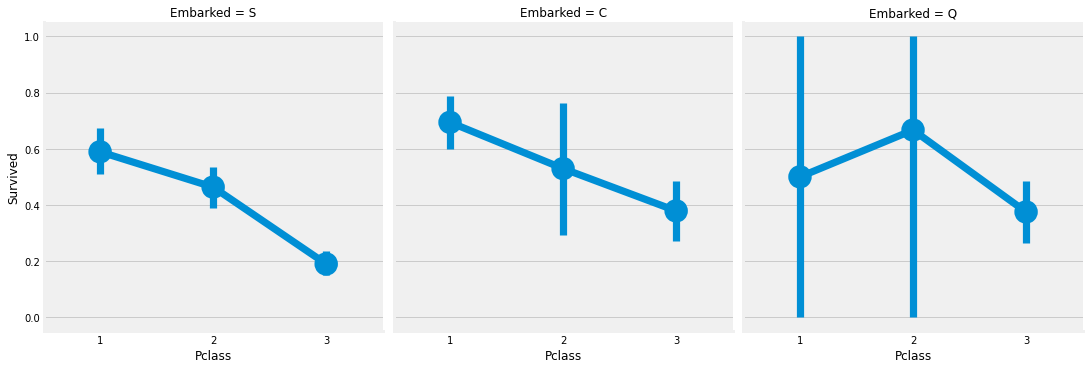

In [105]:
sns.factorplot('Pclass','Survived',col='Embarked',data=data)
plt.show()

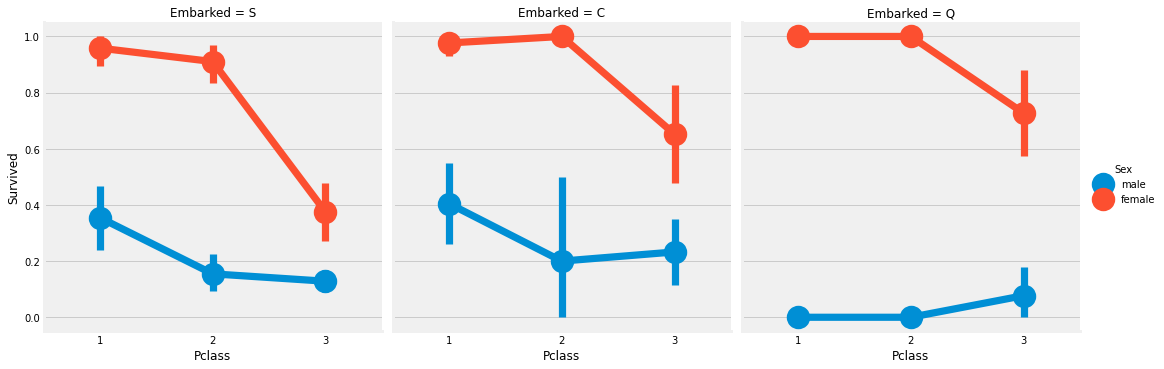

In [205]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### 중간 분석결과 4
1) P클래스1과 P클래스2의  여성은 생존할 확률이 거의 1에 가깝다.

2) S(사우스햄턴)에서 탑승한 P클래스3 Passenegers의 경우 남녀 모두 생존율이 매우 낮기 때문에 P클래스3 Passenegers는 매우 불운한 것으로 보임.

3) Q(퀸스파크)에서 탑승한 대부분 남성은 P클래스 3 인것으로 판단(가난한 남성들이 Q에서 탑승한것으로 보임)

### Embarked 피쳐의 NaN 값 대체하기

S항에서 최대 승객이 탑승한 것으로 보아 NaN을 S로 대체합니다.

In [73]:
data['Embarked'].fillna('S',inplace=True)

In [75]:
data.Embarked.isnull().any()# Finally No NaN values

False

## 1-11.SibSip 값과 생존율과의 관계 분석(Discrete Feature(이산형 데이터))
이 기능은 사람이 혼자 있는지 아니면 가족과 함께 있는지 여부를 나타냅니다.

형제 = 형제, 자매, 의붓동생, 의붓언니

배우자 = 남편, 아내

In [80]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


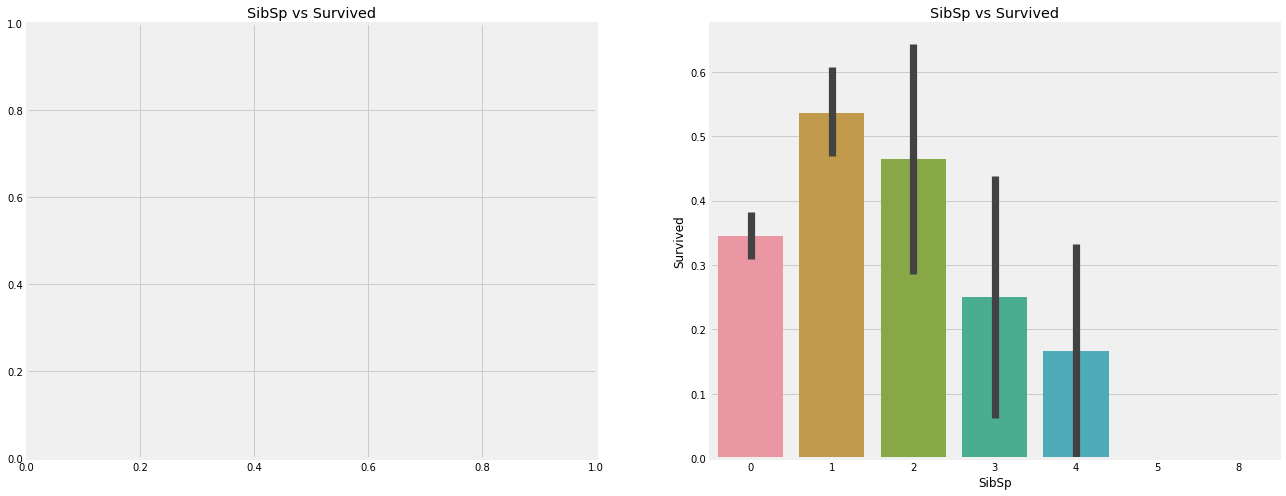

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[1]) # 바플랏
ax[1].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[0]) # 팩터 플랏
#sns.factorplot('Embarked','Survived',data=data, ax=ax[1])
#sns.factorplot('SibSp','Survived',data=data,ax=ax[1]) # 팩터 플랏
ax[0].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

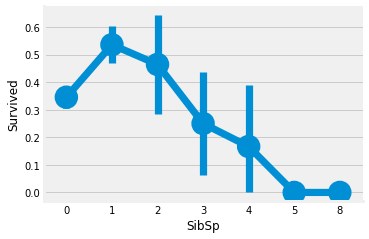

In [94]:
#sns.factorplot('Embarked','Survived',data=data)
sns.factorplot('SibSp','Survived',data=data) # 팩터 플랏
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

In [95]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 중간 분석결과 5
바플랏 그림 및 팩터플랏 그림은 승객이 형제 없이 혼자 탑승한 경우 생존률이 34.5%임을 보여 줍니다. 형제의 수가 증가하면 그래프는 대략적으로 감소합니다. 즉, 만약 내게 가족이 있다면, 나는 먼저 나를 구하는 대신 그들을 구하려고 노력할 것이다. 놀랍게도 5~8명으로 구성된 가족의 생존률은 0%입니다. 그 이유는 P class?

그 이유는 P 클래스입니다. 크로스 탭에서 SibSp3를 가진 사람이 모두 P클래스3에 속한것으로 판단됨. 또 돈인가?

## 1-12.Parch(부모,자식) 피쳐와 생존율과의 관계분석

In [96]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭을 보변 대가족이 P클래스 3에 속했음을 알 수 있습니다

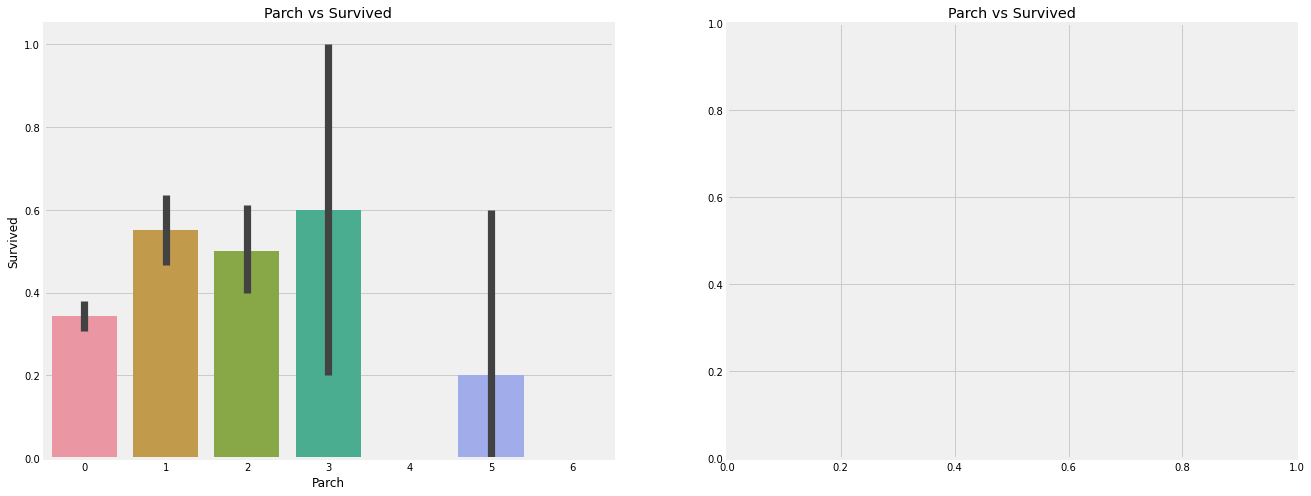

In [97]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

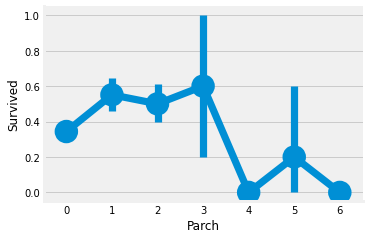

In [99]:
sns.factorplot('Parch','Survived',data=data) # 팩터 플랏
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

### 중간 분석결과 6

여기에서도 결과는 꽤 비슷하다. 부모를 태운 승객은 생존 가능성이 더 크다. 하지만 숫자가 늘어날수록 줄어든다.

생존 확률은 배에 부모 1-3명이 타고 있는 사람에게 좋다. 혼자 있는 것 또한 치명적인 것으로 판명되고 배에 4명 이상의 부모를 태우면 생존 가능성이 줄어든다.

## 1-13.요금 피쳐와 생존율과의 관계 분석(Fare--> Continous Feature)

In [100]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0**. Wow!! a free luxorious ride. 

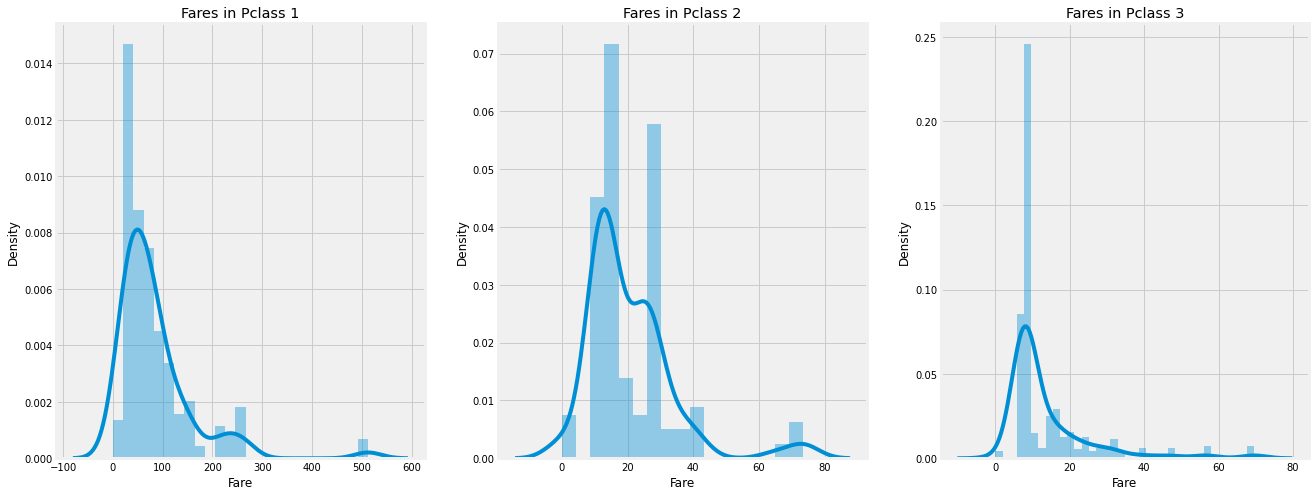

In [101]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

P클래스1의 승객 운임 분포가 큰 것으로 보이며 이 분포는 기준이 줄어들면서 감소세를 지속하고 있다. 이 또한 연속적이기 때문에 binning을 사용하여 이산값으로 변환할 수 있습니다.

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

## 1-14.EDA를 통한 모든 피쳐에 대한 분석 결과 요약
**Sex**: 여성의 생존 확률은 남성과 비교했을 때 높다.

**Pclass**: 일등석 승객이 되면 생존 가능성이 높아진다는 추세가 뚜렷하다. P클래스3의 생존율이 매우 낮습니다. 여성의 경우 P클래스1에서 생존할 확률은 거의 1이며 P클래스2에서도 생존 확률이 높습니다. 돈이 이긴다!!!

**Age**: 5-10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객들이 많이 죽었다.

**Embarked**: 이것은 매우 흥미로운 피쳐입니다. S에서 탑승한 P클래스1 승객보다 C에서 탑승한 Pclass1 승객의 생존 가능성이 더 높아 보인다. 그리고 Q의 승객 대다수가 P클래스3 이었다. 

**Parch+SibSp**: 1-2명의 형제자매, 배우자 또는 1-3명의 부모가 혼자이거나 대가족이 함께 여행하는 것보다 더 큰 가능성을 보여줍니다.

**결론**: 10세-15세 여자승객으로 구성된 자매1~2명이 C에서 탑승해서 Pclass1에 묵은 사람이 제일 잘 살았음. 

## 1-15.Correlation Between The Features(피쳐들간의 상관분석)

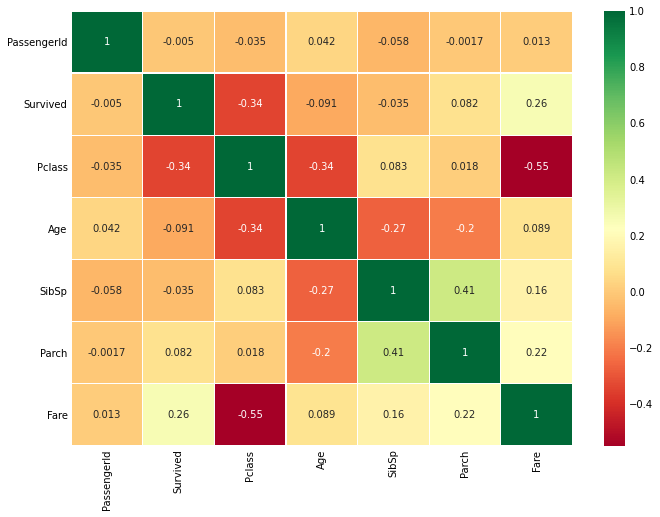

In [106]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 설명

컴퓨터는 알파벳이나 문자열의 상관관계를 알 수 없기 때문에 가장 중요한 것은 숫자적 특징으로 비교해야 한다는 것입니다. 그림을 이해하기 전에 정확한 상관 관계가 무엇인지 살펴보겠습니다.

**양성 상관 관계:** 특성 A가 증가하고 동시에 특성 B가 증가하면 양성 상관 관계입니다. 값 1은 완벽한 양의 상관 관계를 의미합니다.

**음의 상관 관계:** 피쳐 A가 증가하고 동시에 피쳐 B가 감소하면 서로 음의 상관 관계가 있습니다. 값이 -1이면 완벽한 음의 상관 관계를 의미합니다.

이제 두 기능이 매우 또는 완벽하게 상호 연관되어 있기 때문에 한 기능의 증가가 다른 기능의 증가로 이어진다고 가정해 보겠습니다. 이는 두 특징 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 없거나 전혀 없음을 의미합니다. 두 가지 모두 거의 동일한 정보를 포함하고 있기 때문에 이를 **다중공선성**라고 합니다.

그럼 둘 중 하나가 중복이니 둘 다 사용해야 할까요? 

모델을 만들거나 교육하는 동안 중복된 피쳐를 제거하도록 노력해야 합니다. 중복 피쳐 제거는 학습 시간 단축과 오버피팅 제거 등의 많은 이점을 줄일 수 있기 때문입니다.

위의 히트맵을 보면 여러 피쳐들이 서로 크게 상관되어 있지 않다는 것을 알 수 있습니다. **가장 높은 상관관계는 SibSp와 Parchi 0.41이다. 
그리 높지는 않지만 두 피쳐를 합하도록 할 예정입니다.**

하지만 명확한 다중공선성 제거 방법은 공식이 있습니다.
분상팽창지수라는데.....

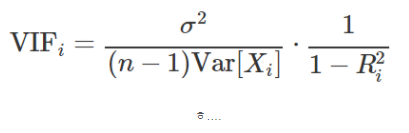

# 2.Part 2: Feature Engineering이란?

데이터셋이 제공될 때마다 모든 피쳐가 전부 중요한 것은 아닙니다. 삭제해야 할 중복 피쳐가 많을 수 있습니다. 또한 우리는 다른 피쳐에서 정보를 관찰하거나 추출하여 새로운 피쳐를 얻거나 추가할 수 있습니다.

위에 이름 피쳐를 사용하여 칭호 이니셜 피쳐을 가져오는 경우를 예로 들 수 있습니다. 새로운 기능을 사용할 수 있는지 확인하고 몇 가지 기능을 제거할 수 있는지 알아보겠습니다. 또한 기존 관련 기능을 예측 모델링에 적합한 형태로 전환할 것입니다.

## 2-1.Age-band

Age 피쳐 문제

앞서 언급했듯이, 나이는 연속적인 특징이며, 기계 학습 모델의 연속적인 변수에 문제가 있습니다.

예:만약 내가 스포츠인을 성별로 분류하거나 배열하라고 한다면, 우리는 그들을 남성과 여성으로 쉽게 구분할 수 있습니다.

내가 그들을 나이별로 묶으라고 한다면, 어떻게 하겠는가? 30명일 경우 30개의 값이 있을 수 있습니다. 

이러한 연속값을 **Binning** 또는 **Normalization**으로 범주형 값으로 변환해야 합니다. 저는 binning을 사용할 것입니다. 즉, 연령 범위를 단일 bin으로 그룹화하거나 단일 값을 할당합니다.

여기서는 Age -> Agen_band로 4개의 Bins를 사용할 예정입니다.

In [75]:
data.org.head() # 오리지널 데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [80]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


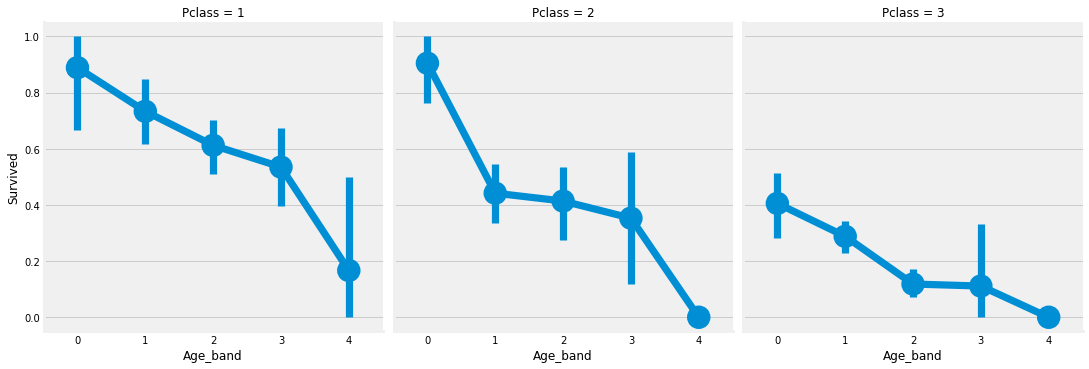

In [81]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

생존율은 P급에 상관없이 나이가 들수록 더 많이 죽는다

True that..the survival rate decreases as the age increases irrespective of the Pclass.

## 2-2.Family_Size and Alone

"Family_size" 및 "Alone"이라는 새로운 기능을 만들어 분석할 수 있습니다. 이 기능은 Parch와 SibSp의 결합입니다. 승객의 가족 규모와 생존율이 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. '혼자'는 승객이 혼자인지 아닌지를 나타냅니다.

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

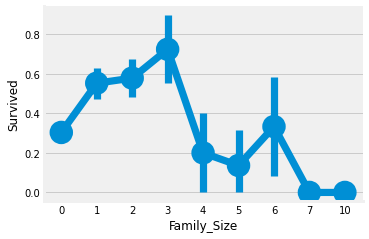

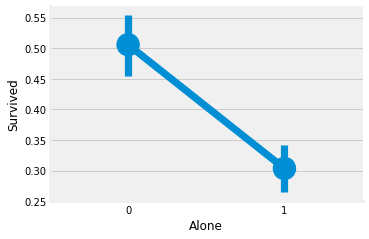

In [82]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

sns.factorplot('Family_Size','Survived',data=data) # 팩터 플랏
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

sns.factorplot('Alone','Survived',data=data) # 팩터 플랏
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()
# f,ax=plt.subplots(1,2,figsize=(18,6))
# sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
# ax[0].set_title('Family_Size vs Survived')
# sns.factorplot('Alone','Survived',data=data,ax=ax[1])
# ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
# plt.show()

In [83]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,2,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,3,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,1,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,0,1,0


Family_Size=0은 승객이 혼자임을 의미합니다.Alone(1,혼자)이거나 Family_size=0이면 생존 확률이 매우 낮습니다. 가족 크기 > 4일 경우 확률도 감소합니다. 이 또한 모델에 있어 중요한 기능으로 보입니다. 이 부분을 좀 더 살펴보겠습니다.

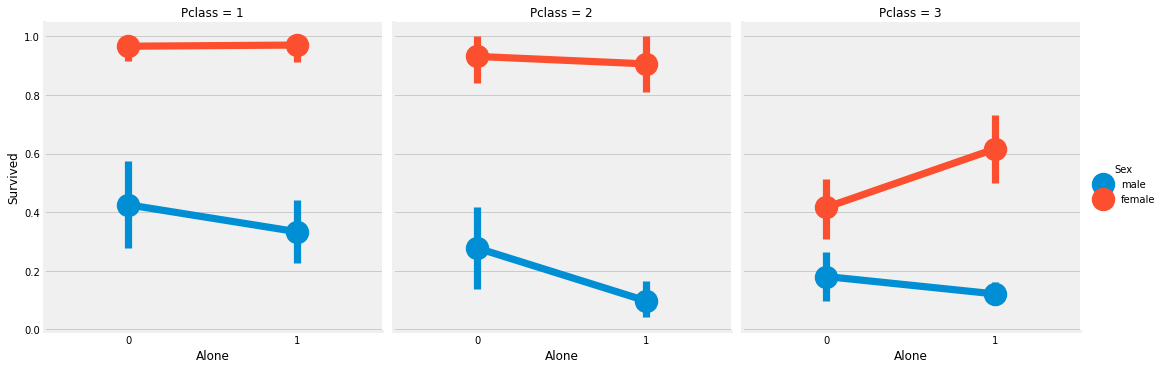

In [84]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

P클래스3의 여성의 경우를 제외하면 혼자 있는 것이 더 많이 죽는 것으로 나타났다.

In [85]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 요금 비쌀수록 생존 가능성이 증가한다는 것을 명확히 알 수 있다.

이제 Fare_Range 값을 그대로 전달할 수 없습니다. Age_Band에서처럼 비닝을 해야 합니다.

As discussed above, we can clearly see that as the **fare_range increases, the chances of survival increases.**

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_Band**

In [86]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

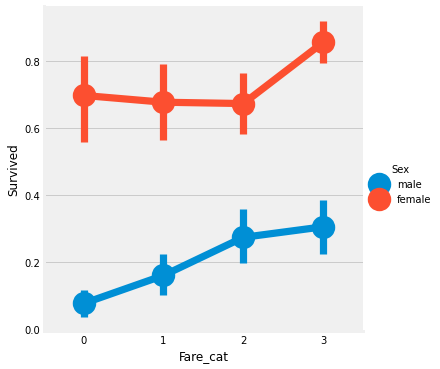

In [87]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

분명히, Fare_cat이 증가할수록 생존 확률은 높아집니다. 이 기능은 Sex와 함께 모델링 시 중요한 기능이 될 수 있습니다.

## 2-4.Converting String Values into Numeric

머신러닝 모델에게 문자열을 전달할 수 없기 때문에 Sex, Embarked 등의 피쳐를 숫자 값으로 변환해야 합니다.


In [88]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## 2-5.불필요 피쳐 제거(Dropping UnNeeded Features)

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp andd Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**

In [93]:
data.org.head() #최초 오리지날 데이터

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
data.head() # 머신러닝 학습을 위한 데이터 변형

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0.0,0,1,1,0,0
1,1,1,1,1,0,1.0,1,2,1,0,3
2,1,3,1,0,0,0.0,2,1,0,1,1
3,1,1,1,1,0,0.0,1,2,1,0,3
4,0,3,0,0,0,0.0,0,2,0,1,1


# 3.Part3: Predictive Modeling

EDA 부분에서 몇 가지 통찰력을 얻었습니다. 하지만 그것으로는 승객이 살아남을 것인지 죽을 것인지 정확하게 예측하거나 말할 수 없다. 이제 승객의 생존 여부를 예측해 보겠습니다. 훌륭한 분류 알고리즘을 사용합니다.모델을 만드는 데 사용할 알고리즘은 다음과 같습니다.

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [130]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [131]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [148]:
#test_X.head()
train_Y.head(800)
#test_Y.head(800)

,Survived
231,0
836,0
639,0
389,1
597,0
...,...
131,0
490,0
838,1
48,0


### 3-1.Radial Support Vector Machines(rbf-SVM)

In [149]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### 3-2.Linear Support Vector Machine(linear-SVM)

In [150]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### 3-3.Logistic Regression

In [134]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### 3-4.Decision Tree

In [135]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8059701492537313


### 3-5.K-Nearest Neighbours(KNN)

In [136]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

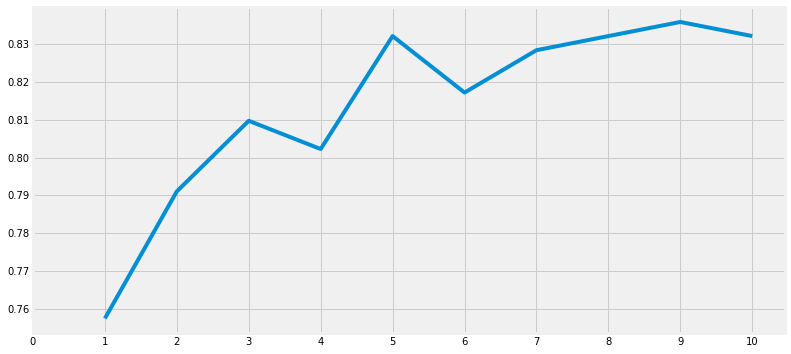

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [137]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### 3-6.Gaussian Naive Bayes

In [138]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### 3-7.Random Forests

In [151]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


모형의 정확성만이 분류자의 건전성을 결정하는 요소는 아닙니다. 분류자가 학습 데이터에 대해 학습을 받고 테스트 데이터에 대해 테스트하여 90%의 정확도를 얻었다고 가정합니다.

이제 분류자로서는 정확도가 매우 좋아 보입니다만, 새로 들어오는 모든 테스트 세트에 대해 90%가 되는지 확인할 수 있을까요? 분류자가 자체 훈련에 사용할 모든 인스턴스를 결정할 수 없기 때문에 대답은 "아니오"입니다. 교육 및 테스트 데이터가 변경됨에 따라 정확도도 변경됩니다. 증가하거나 감소할 수 있습니다. 이를 모형 분산이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 교차 검증을 사용합니다.


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.

To overcome this and get a generalized model,we use **Cross Validation**.


# 4.Cross Validation

데이터가 불균형인 경우가 많습니다. 즉, 클래스 1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 데이터 집합의 모든 인스턴스에 대해 알고리즘을 교육하고 테스트해야 합니다. 그런 다음 데이터셋에 대해 기록된 모든 정확도의 평균을 얻을 수 있습니다.

1) K-Fold Cross Validation은 먼저 데이터 집합을 k-subset으로 나누는 방식으로 작동합니다.

2)데이터셋을 (k=5)개의 부분으로 나눈다고 가정해 보겠습니다. 우리는 테스트를 위해 1개의 부품을 예약하고 4개의 부품에 대해 알고리즘을 교육합니다.

3) 반복시마다 시험부위를 변경하고 다른 부분에 대한 알고리즘을 교육하여 공정을 지속하고 있습니다. 그런 다음 정확도와 오차를 평균화하여 알고리즘의 평균 정확도를 얻습니다.

이를 K-폴드 교차 검증이라고 합니다.

4) 알고리즘은 일부 교육 데이터의 데이터 집합 위에 적합할 수 있으며 때로는 다른 교육 세트의 데이터에도 적합할 수 있습니다. 따라서 교차 검증을 통해 일반화 모델을 달성할 수 있습니다.


Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [152]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.803658,0.032125
Naive Bayes,0.801386,0.028999
Random Forest,0.821573,0.034831


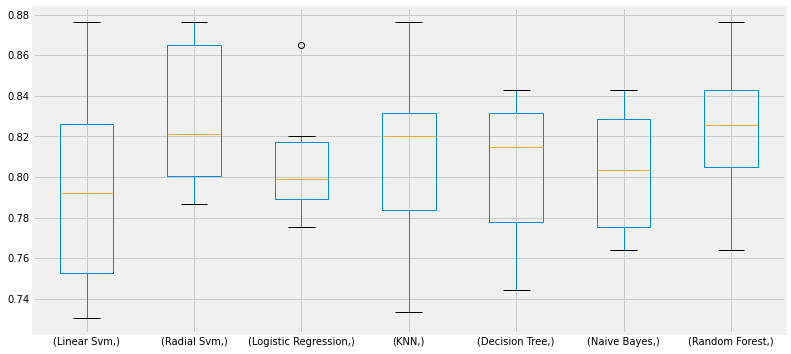

In [153]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

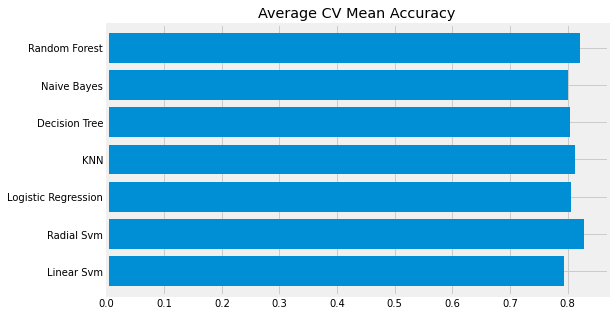

In [154]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## 4-1.Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

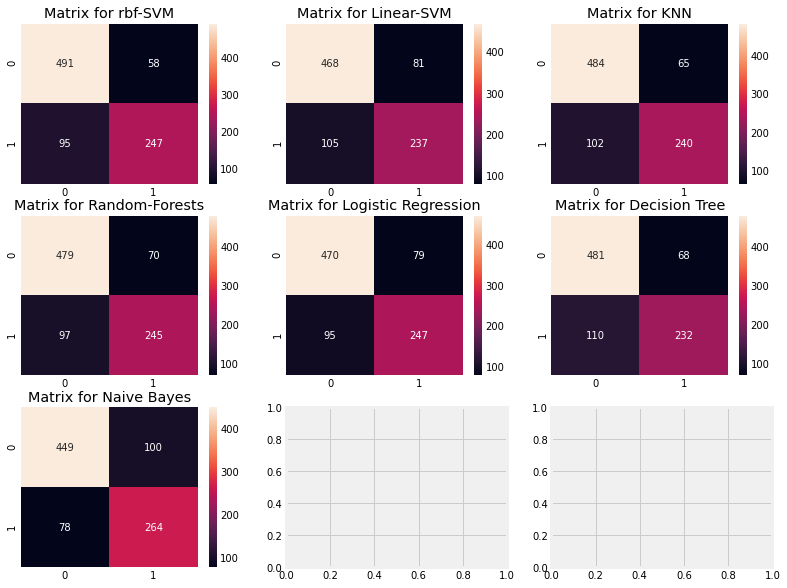

In [155]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.

2)**Errors**-->  Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

### Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

#### SVM

In [156]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.3s finished


### Random Forests

In [157]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   43.5s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The best score for Rbf-Svm is **82.82% with C=0.05 and gamma=0.1**.
For RandomForest, score is abt **81.8% with n_estimators=900**.

# 5.Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [161]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237952559300874


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [162]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


#### Bagged DecisionTree


In [163]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree.  But we can change the dafault base_estimator to any algorithm of our choice.

In [164]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [166]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [167]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 11.0min finished


The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**

### Confusion Matrix for the Best Model

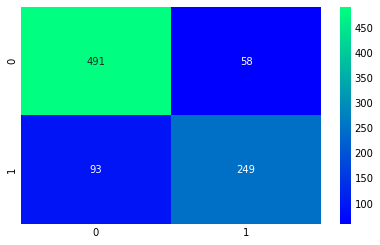

In [168]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

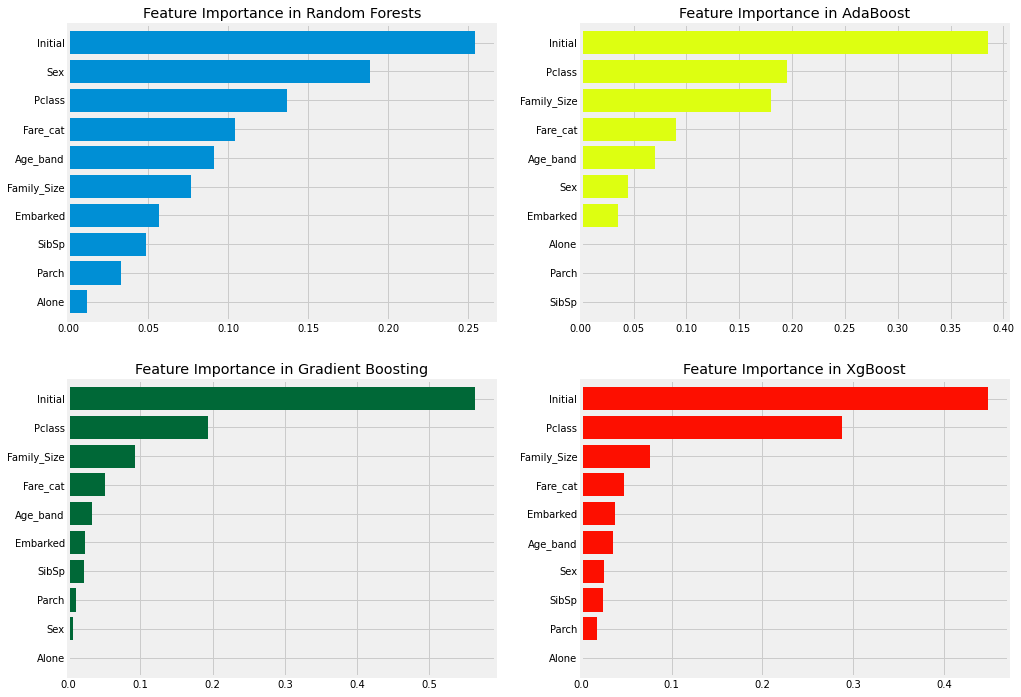

In [169]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:


1) 공통적으로 중요한 기능으로는 Initial, Fare_cat, Pclass, Family_Size 등이 있습니다.

2) Sex 피쳐는 중요하지 않은 것 같은데, P클래스와 결합된 Sex가 매우 좋은 차별화 요소를 제공한다는 것을 앞에서 살펴본 바와 같이 충격적입니다. 성별 피쳐는 랜덤 포레스트에서만 중요해 보인다.

그러나 많은 분류자에서 맨 위에 있는 Initial 피쳐를 볼 수 있습니다.우리는 이미 Sex와 Initial의 긍정적인 상관관계를 보았기 때문에 둘 다 성별을 언급한다.

3) 비슷하게 Pclass와 Fare_cat은 승객의 상태와 Family_Size with Alone, Parch, SibSp를 나타냅니다.




---


1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are:
1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
